In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 觀察數據

In [3]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [4]:
print(digits.keys())
digits_data = digits.data
print('digis.data :', digits_data)
print('digis.data.shape :', digits_data.shape)
digits_target = digits.target
print('digis.target :', digits_target)
print('digis.targer.shape :', digits_target.shape)
print('digis.target_names :', digits.target_names)
digits_images = digits.images
print('digis.images :', digits_images)
print('digis.images.shape :', digits_images.shape)
#print('digis.DESCR :', digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digis.data : [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digis.data.shape : (1797, 64)
digis.target : [0 1 2 ... 8 9 8]
digis.targer.shape : (1797,)
digis.target_names : [0 1 2 3 4 5 6 7 8 9]
digis.images : [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0.

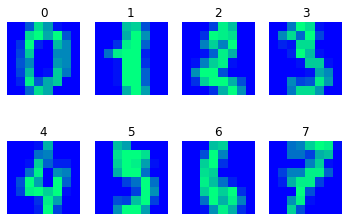

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for i, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.winter)
    plt.title(label)

# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
X_pca = PCA(n_components=2)
reduced_data_X_pca = X_pca.fit_transform(digits_data)
print('reduced_data_X_pca.shape :', reduced_data_X_pca.shape)
print('reduced_data_X_pca :')
print(reduced_data_X_pca)

reduced_data_X_pca.shape : (1797, 2)
reduced_data_X_pca :
[[ -1.2594653   21.2748837 ]
 [  7.9576146  -20.7686999 ]
 [  6.99191998  -9.95598593]
 ...
 [ 10.80128271  -6.96025258]
 [ -4.8721026   12.42395371]
 [ -0.34439334   6.36554974]]


Text(0.5, 1.0, 'PCA Scatter Plot')

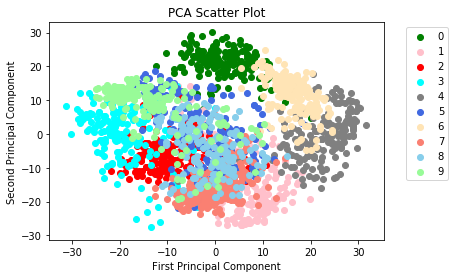

In [19]:
colors = ['green', 'pink', 'red', 'cyan', 'gray', 'royalblue', 'moccasin', 'salmon', 'skyblue', 'palegreen']
for i in range(len(colors)):
    x = reduced_data_X_pca[:, 0][digits.target == i]
    y = reduced_data_X_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor = (1.05, 1))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')

# 資料切分

In [22]:
from sklearn.model_selection  import train_test_split

In [23]:
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits_data, digits.target, digits.images, test_size=0.2, random_state = 0)

#  KMeans 

In [24]:
from sklearn.cluster import KMeans

In [25]:
clf = KMeans(n_clusters = 10, random_state = 0)

In [26]:
clf.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0.98, 'Cluster Center Images')

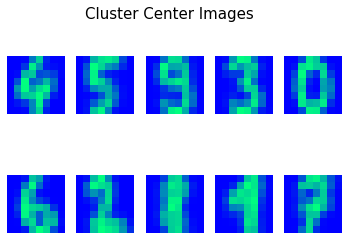

In [41]:
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap = plt.cm.winter)
    plt.axis('off')
plt.suptitle('Cluster Center Images', fontsize = 15)

In [42]:
y_predict = clf.predict(x_test)

In [43]:
print(y_predict - y_test == 0)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True False False False False False False False False  True
 False False False False False False False False False  True False False
 False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False  True  True False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

# 改用Isomap 降維

In [44]:
from sklearn.manifold import Isomap

In [56]:
digits = datasets.load_digits()
digits_data = digits.data
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits_data, digits.target, digits.images, test_size = 0.2, random_state = 0)
clf = KMeans(n_clusters = 10, random_state = 0)
clf.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [57]:
x_iso = Isomap(n_neighbors=10).fit_transform(x_train)
clusters = clf.fit_predict(x_train)

Text(0.5, 1.0, 'Actual Training Labels')

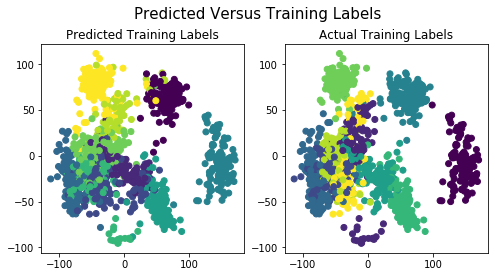

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
fig.suptitle('Predicted Versus Training Labels', fontsize = 15)
fig.subplots_adjust(top = 0.85)
ax[0].scatter(x_iso[:, 0], x_iso[:, 1], c = clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x_iso[:, 0], x_iso[:, 1], c = y_train)
ax[1].set_title('Actual Training Labels')

# 觀察混淆矩陣

In [59]:
from sklearn import metrics

In [60]:
print(metrics.confusion_matrix(y_test, y_predict))

[[ 0  0  0  0 27  0  0  0  0  0]
 [ 0  1  0  0  0  0  8 13 13  0]
 [ 0  0  1  3  1  0 29  0  0  2]
 [ 0  0  3 25  0  0  0  1  0  0]
 [28  0  0  0  0  0  0  0  0  2]
 [ 0 33  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0 38]
 [ 0  0 12  0  0  0  0 24  1  2]
 [ 0  1 33  2  0  0  0  0  3  2]]


## 訓練結果不是很好